In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from skimage.io import imsave, imread
from skimage import data
from skimage import color
from skimage.filters import threshold_otsu
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches

In [2]:
def RGB2HEX(color):
    
    return "#{:02x}{:02x}{:02x}".format(int(color[2]), 
                                        int(color[1]), 
                                        int(color[0]))

def plot_images(img):
    
    plt.figure(figsize = (15, 10))
    plt.imshow(img)
    plt.show()
    
def mergex(mask, img):
    
    result = img.copy()
    
    result[:, :, 0] = mask * img[:, :, 0]
    result[:, :, 1] = mask * img[:, :, 1]
    result[:, :, 2] = mask * img[:, :, 2]
    
    return result

In [3]:
img=cv2.imread("ESSA.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)

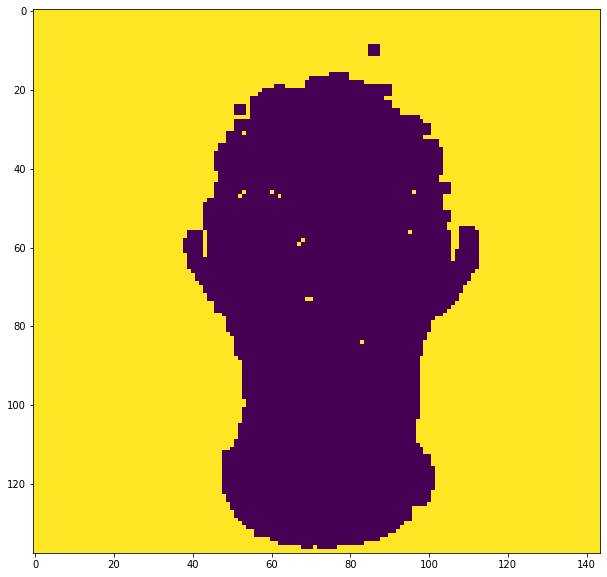

In [4]:
plot_images(HSV_result)

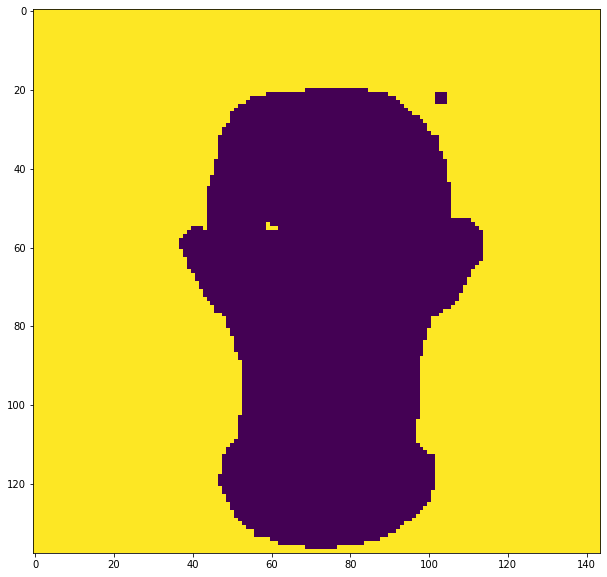

In [5]:
plot_images(YCrCb_result)

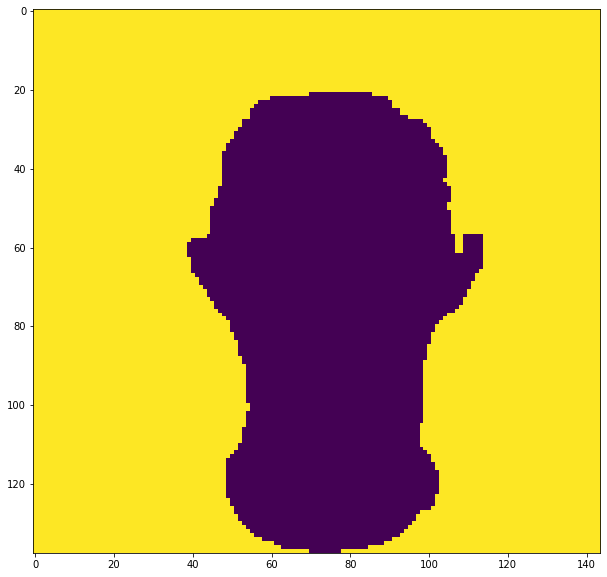

In [6]:
plot_images(global_result)

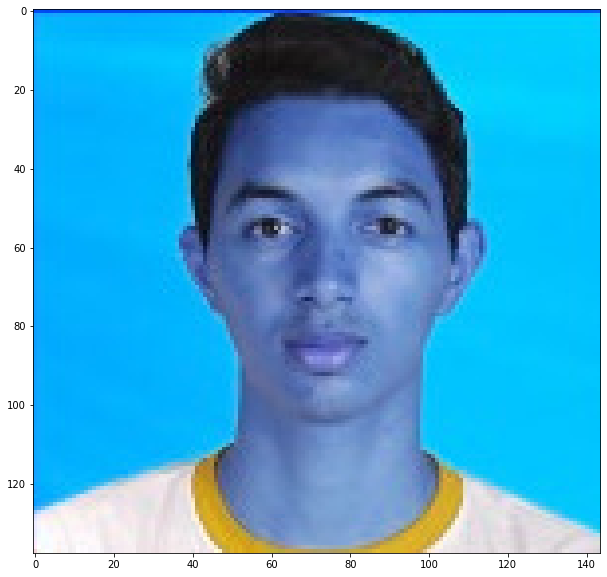

In [7]:
plot_images(img)

In [8]:
test = mergex(global_result, img)

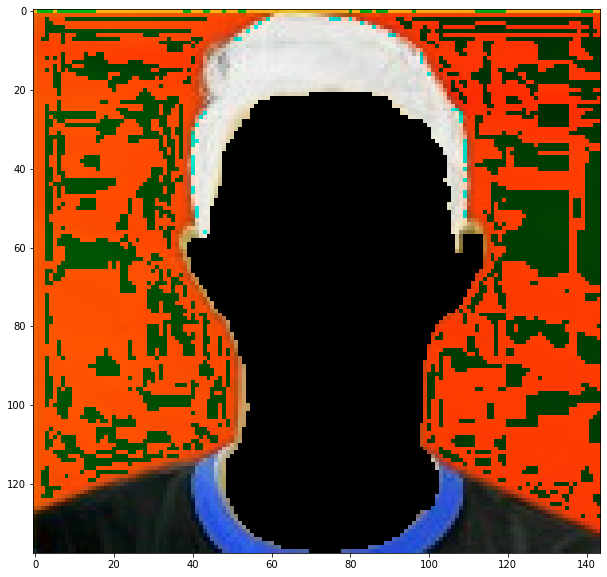

In [9]:
plot_images(test)

In [10]:
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

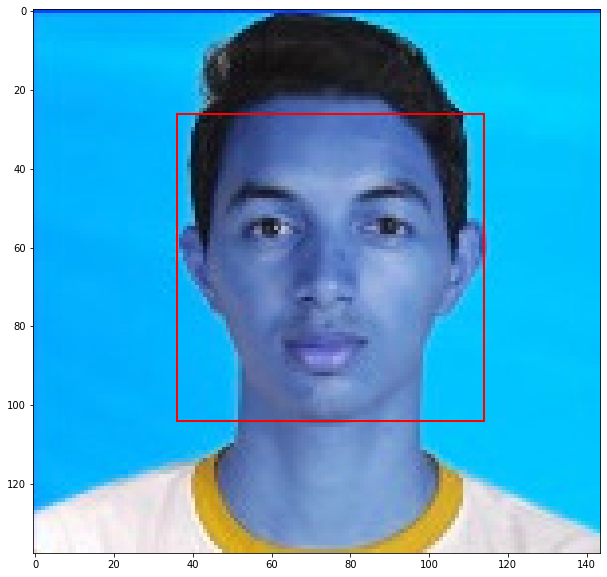

In [11]:
plt.figure(figsize = (15, 10))
plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()